In [ ]:
import pandas as pd
import numpy as np
import pingouin as pg
from datetime import datetime
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [ ]:
url_for_users_data = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-martynov/lesson_1_DM/WORK_FILES/Statistics/ab_users_data.csv'

In [ ]:
url_for_orders = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-martynov/lesson_1_DM/WORK_FILES/Statistics/ab_orders.csv'

In [ ]:
url_for_products = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-d-martynov/lesson_1_DM/WORK_FILES/Statistics/ab_products.csv'

In [ ]:
users_data = pd.read_csv(url_for_users_data, parse_dates=['date', 'time'])

In [ ]:
orders = pd.read_csv(url_for_orders, parse_dates=['creation_time'])

In [ ]:
products = pd.read_csv(url_for_products)

# EDA

In [ ]:
users_data.head()

,user_id,order_id,action,time,date,group
0,964,1255,create_order,2022-08-26 00:00:19,2022-08-26,0
1,965,1256,create_order,2022-08-26 00:02:21,2022-08-26,1
2,964,1257,create_order,2022-08-26 00:02:27,2022-08-26,0
3,966,1258,create_order,2022-08-26 00:02:56,2022-08-26,0
4,967,1259,create_order,2022-08-26 00:03:37,2022-08-26,1


In [ ]:
users_data.isna().sum()

user_id     0
order_id    0
action      0
time        0
date        0
group       0
dtype: int64

In [ ]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4337 entries, 0 to 4336
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   4337 non-null   int64         
 1   order_id  4337 non-null   int64         
 2   action    4337 non-null   object        
 3   time      4337 non-null   datetime64[ns]
 4   date      4337 non-null   datetime64[ns]
 5   group     4337 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 203.4+ KB


In [ ]:
users_data.describe()

,user_id,order_id,group
count,4337.000000,4337.000000,4337.000000
mean,1466.771270,16362.859811,0.610099
std,290.451607,16609.671919,0.487784
min,964.000000,1255.000000,0.000000
25%,1220.000000,2444.000000,0.000000
50%,1463.000000,9615.000000,1.000000
75%,1710.000000,26920.000000,1.000000
max,1980.000000,59533.000000,1.000000


In [ ]:
users_data['action'].unique()

array(['create_order', 'cancel_order'], dtype=object)

#####  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
orders.dtypes

order_id                  int64
creation_time    datetime64[ns]
product_ids              object
dtype: object

In [ ]:
orders['product_ids'] = orders['product_ids'].apply(lambda x: list(map(int, x.strip('{}').split(', '))))

In [ ]:
orders = orders.explode('product_ids')
orders.head()

,order_id,creation_time,product_ids
0,1255,2022-08-26 00:00:19,75
0,1255,2022-08-26 00:00:19,22
0,1255,2022-08-26 00:00:19,53
0,1255,2022-08-26 00:00:19,84
1,1256,2022-08-26 00:02:21,56


In [ ]:
orders['product_ids'].unique()

array([75, 22, 53, 84, 56, 76, 39, 34, 41, 38, 74, 6, 20, 45, 67, 26, 30,
       35, 69, 23, 33, 5, 60, 19, 42, 25, 54, 78, 80, 65, 47, 16, 3, 40,
       70, 57, 61, 46, 21, 86, 64, 52, 17, 71, 77, 27, 7, 8, 24, 36, 58,
       15, 63, 83, 79, 31, 18, 48, 68, 1, 2, 32, 66, 81, 10, 28, 12, 62,
       9, 51, 72, 87, 37, 14, 55, 85, 50, 29, 59, 44, 43, 82, 49, 73, 4,
       13, 11], dtype=object)

##### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
products.head()

,product_id,name,price
0,1,сахар,150.0
1,2,чай зеленый в пакетиках,50.0
2,3,вода негазированная,80.4
3,4,леденцы,45.5
4,5,кофе 3 в 1,15.0


In [ ]:
products['product_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87])

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Соединяем датафреймы

In [ ]:
transition = pd.merge(users_data, orders, on='order_id')
transition.rename(columns={'product_ids':'product_id'}, inplace=True)

In [ ]:
df = pd.merge(transition, products, on='product_id')

In [ ]:
df.isna().sum()

user_id          0
order_id         0
action           0
time             0
date             0
group            0
creation_time    0
product_id       0
name             0
price            0
dtype: int64

In [ ]:
df.dtypes

user_id                   int64
order_id                  int64
action                   object
time             datetime64[ns]
date             datetime64[ns]
group                     int64
creation_time    datetime64[ns]
product_id               object
name                     object
price                   float64
dtype: object

##### Смотрим на данные для тестовой и контрольной групп

In [ ]:
test = df[df['group'] == 1]
test.head()

,user_id,order_id,action,time,date,group,creation_time,product_id,name,price
2,1073,1403,create_order,2022-08-26 03:01:40,2022-08-26,1,2022-08-26 03:01:40,75,сок ананасовый,120.0
3,1089,1424,create_order,2022-08-26 04:01:22,2022-08-26,1,2022-08-26 04:01:22,75,сок ананасовый,120.0
4,1139,1495,create_order,2022-08-26 06:04:05,2022-08-26,1,2022-08-26 06:04:05,75,сок ананасовый,120.0
5,1290,1710,create_order,2022-08-26 10:04:41,2022-08-26,1,2022-08-26 10:04:41,75,сок ананасовый,120.0
8,1547,2064,create_order,2022-08-26 15:29:53,2022-08-26,1,2022-08-26 15:29:53,75,сок ананасовый,120.0


In [ ]:
control = df[df['group'] == 0]
control.head()

,user_id,order_id,action,time,date,group,creation_time,product_id,name,price
0,964,1255,create_order,2022-08-26 00:00:19,2022-08-26,0,2022-08-26 00:00:19,75,сок ананасовый,120.0
1,987,1287,create_order,2022-08-26 00:31:36,2022-08-26,0,2022-08-26 00:31:36,75,сок ананасовый,120.0
6,1350,1791,create_order,2022-08-26 11:18:28,2022-08-26,0,2022-08-26 11:18:28,75,сок ананасовый,120.0
7,1475,1957,create_order,2022-08-26 13:47:21,2022-08-26,0,2022-08-26 13:47:21,75,сок ананасовый,120.0
12,1634,2199,create_order,2022-08-26 17:28:53,2022-08-26,0,2022-08-26 17:28:53,75,сок ананасовый,120.0


# ---------------------------------------------------------------------------------------------------------------

### Посмотрим количество покупок созданных заказов по дате

In [ ]:
test.shape

(8892, 10)

In [ ]:
test.groupby('action')[['creation_time']].count()

,creation_time
action,
cancel_order,456
create_order,8436


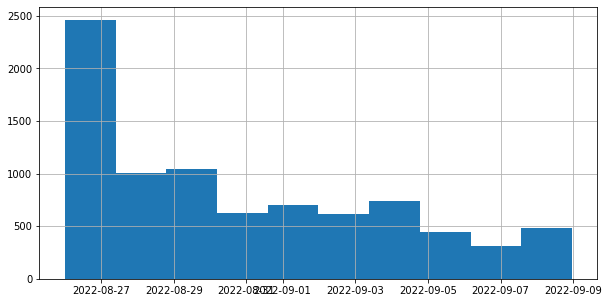

In [ ]:
picture_test = test[test['action'] == 'create_order']['creation_time'].hist(figsize=(10,5))

In [ ]:
control.shape

(5677, 10)

In [ ]:
control.groupby('action')[['name']].count()

,name
action,
cancel_order,287
create_order,5390


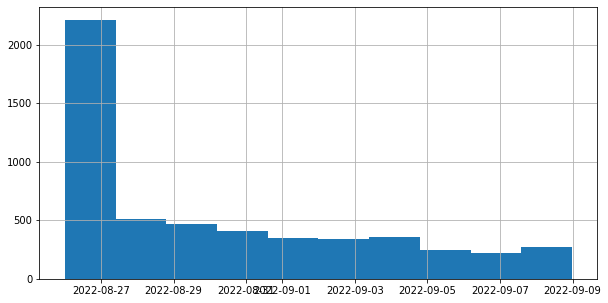

In [ ]:
picture_control = control[control['action'] == 'create_order']['creation_time'].hist(figsize=(10,5))

# ---------------------------------------------------------------------------------------------------------------

In [ ]:
test.head()

,user_id,order_id,action,time,date,group,creation_time,product_id,name,price
2,1073,1403,create_order,2022-08-26 03:01:40,2022-08-26,1,2022-08-26 03:01:40,75,сок ананасовый,120.0
3,1089,1424,create_order,2022-08-26 04:01:22,2022-08-26,1,2022-08-26 04:01:22,75,сок ананасовый,120.0
4,1139,1495,create_order,2022-08-26 06:04:05,2022-08-26,1,2022-08-26 06:04:05,75,сок ананасовый,120.0
5,1290,1710,create_order,2022-08-26 10:04:41,2022-08-26,1,2022-08-26 10:04:41,75,сок ананасовый,120.0
8,1547,2064,create_order,2022-08-26 15:29:53,2022-08-26,1,2022-08-26 15:29:53,75,сок ананасовый,120.0


In [ ]:
control.head()

,user_id,order_id,action,time,date,group,creation_time,product_id,name,price
0,964,1255,create_order,2022-08-26 00:00:19,2022-08-26,0,2022-08-26 00:00:19,75,сок ананасовый,120.0
1,987,1287,create_order,2022-08-26 00:31:36,2022-08-26,0,2022-08-26 00:31:36,75,сок ананасовый,120.0
6,1350,1791,create_order,2022-08-26 11:18:28,2022-08-26,0,2022-08-26 11:18:28,75,сок ананасовый,120.0
7,1475,1957,create_order,2022-08-26 13:47:21,2022-08-26,0,2022-08-26 13:47:21,75,сок ананасовый,120.0
12,1634,2199,create_order,2022-08-26 17:28:53,2022-08-26,0,2022-08-26 17:28:53,75,сок ананасовый,120.0


### Строю график цены созданного заказа в тестовой и контрольной группах.
#### Смотрю какое количество товара и за какую цену купили

In [ ]:
test[test['action'] == 'create_order']['price'].mean()

110.15078236130869

In [ ]:
control[control['action'] == 'create_order']['price'].mean()

113.81981447124305

## Формирую гипотезы о том, что два средних из одной совокупности

#### H0: средние из одной ГС
#### H1: средние из разных ГС

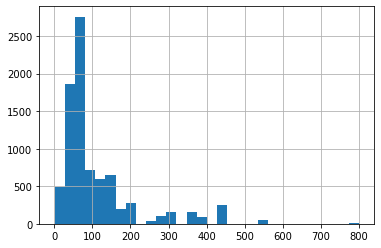

In [ ]:
test[test['action'] == 'create_order']['price'].hist(bins=30)

##### Как мы можем заметить, что распределение не является нормальным для тестовой группы, аналагично и у контрольной.


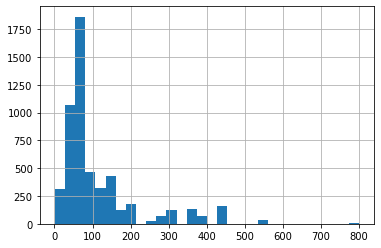

In [ ]:
control[control['action'] == 'create_order']['price'].hist(bins=30)

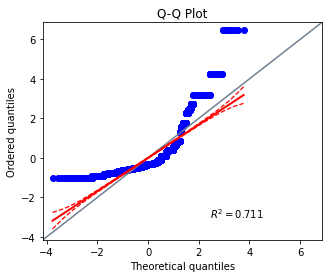

In [ ]:
pg.qqplot(test[test['action'] == 'create_order']['price'], dist='norm')

In [ ]:
pg.normality(test[test['action'] == 'create_order']['price'], method='normaltest')

,W,pval,normal
price,4143.68308,0.0,False


###### Необходимо прологарифмировать, для того чтобы распределение было нормальным

In [ ]:
test_normal_distrib = np.log(test[test['action'] == 'create_order']['price'])

In [ ]:
control_normal_distrib = np.log(control[control['action'] == 'create_order']['price'])

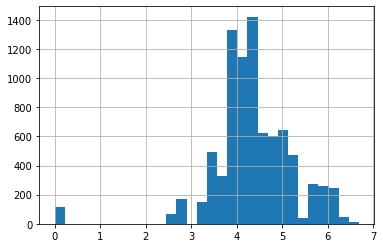

In [ ]:
test_normal_distrib.hist(bins=30)

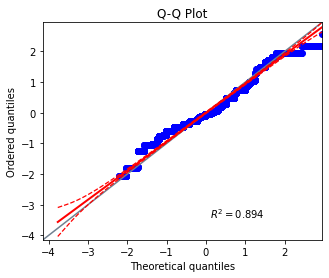

In [ ]:
pg.qqplot(test_normal_distrib, dist='norm')

In [ ]:
pg.normality(test_normal_distrib,  method='normaltest')

,W,pval,normal
price,2263.666424,0.0,False


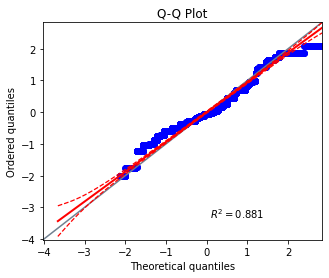

In [ ]:
pg.qqplot(control_normal_distrib, dist='norm')

In [ ]:
pg.ttest(test_normal_distrib, control_normal_distrib)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.274383,11194.948105,two-sided,0.202554,"[-0.05, 0.01]",0.022389,0.044,0.250076


## Не можем отклонить нулевую гипотезу

## Проверяю общую выручку

In [ ]:
test.head()

,user_id,order_id,action,time,date,group,creation_time,product_id,name,price
2,1073,1403,create_order,2022-08-26 03:01:40,2022-08-26,1,2022-08-26 03:01:40,75,сок ананасовый,120.0
3,1089,1424,create_order,2022-08-26 04:01:22,2022-08-26,1,2022-08-26 04:01:22,75,сок ананасовый,120.0
4,1139,1495,create_order,2022-08-26 06:04:05,2022-08-26,1,2022-08-26 06:04:05,75,сок ананасовый,120.0
5,1290,1710,create_order,2022-08-26 10:04:41,2022-08-26,1,2022-08-26 10:04:41,75,сок ананасовый,120.0
8,1547,2064,create_order,2022-08-26 15:29:53,2022-08-26,1,2022-08-26 15:29:53,75,сок ананасовый,120.0


In [ ]:
test.shape

(8892, 10)

In [ ]:
control.shape

(5677, 10)

In [ ]:
control.head()

,user_id,order_id,action,time,date,group,creation_time,product_id,name,price
0,964,1255,create_order,2022-08-26 00:00:19,2022-08-26,0,2022-08-26 00:00:19,75,сок ананасовый,120.0
1,987,1287,create_order,2022-08-26 00:31:36,2022-08-26,0,2022-08-26 00:31:36,75,сок ананасовый,120.0
6,1350,1791,create_order,2022-08-26 11:18:28,2022-08-26,0,2022-08-26 11:18:28,75,сок ананасовый,120.0
7,1475,1957,create_order,2022-08-26 13:47:21,2022-08-26,0,2022-08-26 13:47:21,75,сок ананасовый,120.0
12,1634,2199,create_order,2022-08-26 17:28:53,2022-08-26,0,2022-08-26 17:28:53,75,сок ананасовый,120.0


In [ ]:
test[test['action'] == 'create_order'].groupby('product_id')['price'].sum().sum()

929232.0000000002

In [ ]:
control[control['action'] == 'create_order'].groupby('product_id')['price'].sum().sum()

613488.8

##### Минимальные и максимальные даты создания заказа. Нужно нам для того, чтобы посмотреть интервал

In [ ]:
print(test['creation_time'].dt.date.min(), control['creation_time'].dt.date.min())

2022-08-26 2022-08-26


In [ ]:
print(test['creation_time'].dt.date.max(), control['creation_time'].dt.date.max())

2022-09-08 2022-09-08


##### Мы видим, что в тестовом варианте выручки больше, это связано с тем, что во время акции мы распродали больше товаров за один и тот же интервал времени, что и у контрольной группы, тем самым уменьшив средний чек.

#### Но этот вывод противоречит моей гипотезе о средних ГС, так как мы не смогли принять альтернативную

## Проверяю сумму заказа

In [ ]:
test.head()

,user_id,order_id,action,time,date,group,creation_time,product_id,name,price
2,1073,1403,create_order,2022-08-26 03:01:40,2022-08-26,1,2022-08-26 03:01:40,75,сок ананасовый,120.0
3,1089,1424,create_order,2022-08-26 04:01:22,2022-08-26,1,2022-08-26 04:01:22,75,сок ананасовый,120.0
4,1139,1495,create_order,2022-08-26 06:04:05,2022-08-26,1,2022-08-26 06:04:05,75,сок ананасовый,120.0
5,1290,1710,create_order,2022-08-26 10:04:41,2022-08-26,1,2022-08-26 10:04:41,75,сок ананасовый,120.0
8,1547,2064,create_order,2022-08-26 15:29:53,2022-08-26,1,2022-08-26 15:29:53,75,сок ананасовый,120.0


In [ ]:
control.head()

,user_id,order_id,action,time,date,group,creation_time,product_id,name,price
0,964,1255,create_order,2022-08-26 00:00:19,2022-08-26,0,2022-08-26 00:00:19,75,сок ананасовый,120.0
1,987,1287,create_order,2022-08-26 00:31:36,2022-08-26,0,2022-08-26 00:31:36,75,сок ананасовый,120.0
6,1350,1791,create_order,2022-08-26 11:18:28,2022-08-26,0,2022-08-26 11:18:28,75,сок ананасовый,120.0
7,1475,1957,create_order,2022-08-26 13:47:21,2022-08-26,0,2022-08-26 13:47:21,75,сок ананасовый,120.0
12,1634,2199,create_order,2022-08-26 17:28:53,2022-08-26,0,2022-08-26 17:28:53,75,сок ананасовый,120.0


## Хочу провести т-тест для средних по сумме заказа

### Формулирую гипотезы:
#### H0: средние из одной ГС
#### H1: средние из разных ГС

In [ ]:
print('Средняя сумма заказа',test[test['action'] == 'create_order'].groupby('order_id')['price'].sum().mean())

Средняя сумма заказа 369.6229116945107


In [ ]:
np.std(test[test['action'] == 'create_order'].groupby('order_id')['price'].sum())

247.0922752861378

In [ ]:
print('Средняя сумма заказа', control[control['action'] == 'create_order'].groupby('order_id')['price'].sum().mean())

Средняя сумма заказа 381.2857675574892


In [ ]:
np.std(control[control['action'] == 'create_order'].groupby('order_id')['price'].sum())

245.5931521042886

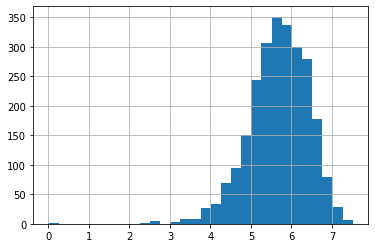

In [ ]:
np.log(test[test['action'] == 'create_order'].groupby('order_id')['price'].sum()).hist(bins=30)

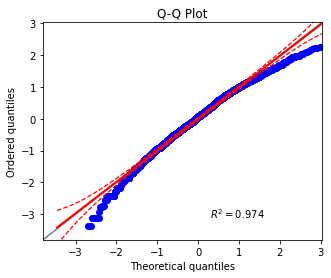

In [ ]:
pg.qqplot(np.log(test[test['action'] == 'create_order'].groupby('order_id')['price'].sum()), dist='norm')

In [ ]:
pg.normality(np.log(test[test['action'] == 'create_order'].groupby('order_id')['price'].sum()),  method='normaltest')

,W,pval,normal
price,292.789947,2.639191e-64,False


In [ ]:
pg.normality(np.log(control[control['action'] == 'create_order'].groupby('order_id')['price'].sum()),  method='normaltest')

,W,pval,normal
price,158.213432,4.409504e-35,False


### Как мы видим распределение ненормальнье, но так как данных много попробую сделать т-тест

In [ ]:
pg.ttest(np.log(test[test['action'] == 'create_order'].groupby('order_id')['price'].sum()),
                np.log(control[control['action'] == 'create_order'].groupby('order_id')['price'].sum()))

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.808761,3487.2776,two-sided,0.070574,"[-0.09, 0.0]",0.05744,0.183,0.43604


## Не можем отклонить H0

# Вывод 1:
#### Скорее всего в приложении по доставке продуктов была выкачена акция на время с 2022-08-26 по 2022-09-08. В тестовой группе был снижен средний чек, и следовательно было продано больше продуктов, а именно 8892, из-за чего общая выручка составила - 929тыс. что гораздо больше контрольной группы - 613488тыс.. Но и также средняя сумма заказа была меньше в тестовой группе и равнялась 369, что сильно меньше контрольной группы 381

# Вывод 2:
####  Новая система рекомендаций смогла принести пользу бизнесу, так как увеличилась общая выручка, и пользователям, так снизились цены на товары.

# Вывод 3:
#### Не смотря на то, что я не смог получить статзначимые различия, то могу заключить то, что выгодно реализовывать тестовый вариант в том случае, если срок годности товаров подходит к концу и нам невыгодно списывать испорченный товар.